### Análisis de Segmentación de Clientes

RFM es una técnica de análisis de clientes que permite segmentarlos en grupos basándose en su comportamiento de compra. El nombre viene de las tres dimensiones que analiza:

R - Recency (Recencia)

* Qué mide: ¿Cuánto tiempo ha pasado desde la última compra del cliente?

* Objetivo: Identificar clientes activos vs. inactivos

* Fórmula típica: Fecha actual - Fecha última compra

F - Frequency (Frecuencia)

* Qué mide: ¿Con qué frecuencia compra el cliente?

* Objetivo: Identificar clientes leales vs. ocasionales

* Fórmula típica: Número total de transacciones

M - Monetary (Valor Monetario)

* Qué mide: ¿Cuánto dinero ha gastado el cliente?

* Objetivo: Identificar clientes más valiosos

* Fórmula típica: Suma total gastada

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [263]:
df = pd.read_csv('df_Online_Retail.csv')
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
964,536544,21716,BOYS VINTAGE TIN SEASIDE BUCKET,1.0,2010-12-01T14:32:00Z,5.06,NaN,United Kingdom
18219,537846,22378,WALL TIDY RETROSPOT,10.0,2010-12-08T15:25:00Z,2.1,15347.0,United Kingdom
5638,536973,22457,NATURAL SLATE HEART CHALKBOARD,12.0,2010-12-03T13:43:00Z,2.95,17787.0,United Kingdom
12257,537429,22536,MAGIC DRAWING SLATE PURDEY,1.0,2010-12-06T15:54:00Z,0.42,12748.0,United Kingdom
611,536544,22573,STAR WOODEN CHRISTMAS DECORATION,5.0,2010-12-01T14:32:00Z,1.66,NaN,United Kingdom


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    50000 non-null  object 
 1   StockCode    50000 non-null  object 
 2   Description  49857 non-null  object 
 3   Quantity     50000 non-null  float64
 4   InvoiceDate  50000 non-null  object 
 5   UnitPrice    50000 non-null  object 
 6   CustomerID   31599 non-null  float64
 7   Country      50000 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.1+ MB


In [265]:
print("Valores 'Null' en UnitPrice:", (df['UnitPrice'] == 'Null').sum())
df['UnitPrice'].unique()

Valores 'Null' en UnitPrice: 15


array(['1.25', '0.29', '2.1', '0.95', '1.95', '2.55', '1.65', '0.42',
       '1.45', '2.95', '9.95', '4.95', '3.75', '4.25', '0.85', '0.65',
       '3.35', '12.75', '8.5', '5.95', '6.75', '6.95', '7.95', '1.69',
       '4.65', '18.0', '14.95', '16.95', '19.95', '3.95', '1.06', '0.55',
       '1.49', '3.25', '10.95', '7.65', '18.95', '6.35', '2.25', '8.95',
       '50.0', '2.51', '1.66', '0.43', '7.62', '4.21', '2.98', '5.91',
       '3.36', '16.98', '1.28', '11.02', '8.47', '0.81', '5.06', '12.72',
       '10.17', '6.77', '20.38', '11.87', '25.49', '51.02', '9.32',
       '34.0', '0.84', '16.13', '21.23', '18.68', '14.43', '3.81', '4.24',
       '1.26', '5.09', '2.96', '2.11', '569.77', '13.57', '0.0', '0.12',
       '5.45', '6.45', '29.95', '3.39', '4.6', '1.05', '3.45', '0.21',
       '5.49', '59.53', '15.28', '19.53', '2.82', '1.27', '3.19', '0.99',
       '2.13', '5.51', '8.49', '8.07', '7.22', '2.54', '9.34', '5.94',
       '607.49', '0.19', '35.75', '1.85', '2.75', 'Null', '10.75

In [266]:
print(df['Quantity'].min())
print(df['Quantity'].max())

-9360.0
2880.0


Debido a que no hace mucho sentido tener valores negativos ya que el set de datos solo nos muestra las compras de los clientes y no las compras a del almacen a mayoristas procederemos a ajustar los numeros a positivos

In [267]:
df['Quantity']= df['Quantity'].abs()
print(df['Quantity'].min())

1.0


In [268]:
    # vamos a transformar la columna InvoiceDate a tipo fecha
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'], format= 'ISO8601').dt.tz_localize(None)
df['Quantity']= df['Quantity'].astype(int)

# vamos a eliminar los valores que no son numericos
df= df[df['UnitPrice'] != 'Null']
# una vez filtrado, convertimos la columna a tipo float
df['UnitPrice']= df['UnitPrice'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49985 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    49985 non-null  object        
 1   StockCode    49985 non-null  object        
 2   Description  49842 non-null  object        
 3   Quantity     49985 non-null  int64         
 4   InvoiceDate  49985 non-null  datetime64[ns]
 5   UnitPrice    49985 non-null  float64       
 6   CustomerID   31586 non-null  float64       
 7   Country      49985 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 3.4+ MB


In [269]:
print(f' Total de datos nulos: \n{df.isnull().sum()}')
print(f'El porcentaje de valores nulos para customerid es:{df['CustomerID'].isna().sum()/ len(df):.2%}')

 Total de datos nulos: 
InvoiceNo          0
StockCode          0
Description      143
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     18399
Country            0
dtype: int64
El porcentaje de valores nulos para customerid es:36.81%


In [270]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536520,21123,SET/10 IVORY POLKADOT PARTY CANDLES,1,2010-12-01 12:43:00,1.25,14729.0,United Kingdom
1,536520,21124,SET/10 BLUE POLKADOT PARTY CANDLES,1,2010-12-01 12:43:00,1.25,14729.0,United Kingdom
2,536520,21122,SET/10 PINK POLKADOT PARTY CANDLES,1,2010-12-01 12:43:00,1.25,14729.0,United Kingdom
3,536520,84378,SET OF 3 HEART COOKIE CUTTERS,1,2010-12-01 12:43:00,1.25,14729.0,United Kingdom
4,536520,21985,PACK OF 12 HEARTS DESIGN TISSUES,12,2010-12-01 12:43:00,0.29,14729.0,United Kingdom


Como podemos ver la mayor cantidad de datos nulos o vacios procede del Id de los clientes, dado que estos son cerca del 37% de nuestros datos, por ahora se decide no descartarlos. 

In [271]:
# Vamos a ver que intervalos de fechas tenemos en el dataset
print(f'Fecha minima: {df["InvoiceDate"].min()}')
print(f'Fecha maxima: {df["InvoiceDate"].max()}')

Fecha minima: 2010-12-01 12:43:00
Fecha maxima: 2011-01-10 11:38:00


Nuestro Data set comprende las compras del mes de Diciembre hasta el mes de Enero siendo mas especificos el dia 10.

In [272]:
# Vamos a buscar el 'Recency' este indicador nos ayudara a saber que tan reciente es la compra de un cliente
# Para ello primero debemos identificar a los Clientes Unicos 

customer = pd.DataFrame(df['CustomerID'].unique())
customer.columns=['Customer_id']
customer

,Customer_id
0,14729.0
1,12748.0
2,15012.0
3,12868.0
4,17572.0
...,...
1026,12524.0
1027,17811.0
1028,16850.0
1029,14321.0


In [273]:
# Obtener la ultima compra por cliente

customer= df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
customer.columns= ['Customer_id','Last_purchase']
customer.head()

,Customer_id,Last_purchase
0,12347.0,2010-12-07 14:57:00
1,12348.0,2010-12-16 19:09:00
2,12370.0,2010-12-17 09:38:00
3,12377.0,2010-12-20 09:37:00
4,12383.0,2010-12-22 14:28:00


In [274]:
# vamos a calcular la 'Recency', para ello restaremos la ultima compra registrada (MAX) a cada uno de las fechas de los datos en nuestro df, 
# Con ello comparamos la fecha mas reciente de compra en nuestro data set con las demas

customer['Recency']= (customer['Last_purchase'].max() - customer['Last_purchase']).dt.days
customer.head()

,Customer_id,Last_purchase,Recency
0,12347.0,2010-12-07 14:57:00,33
1,12348.0,2010-12-16 19:09:00,24
2,12370.0,2010-12-17 09:38:00,24
3,12377.0,2010-12-20 09:37:00,21
4,12383.0,2010-12-22 14:28:00,18


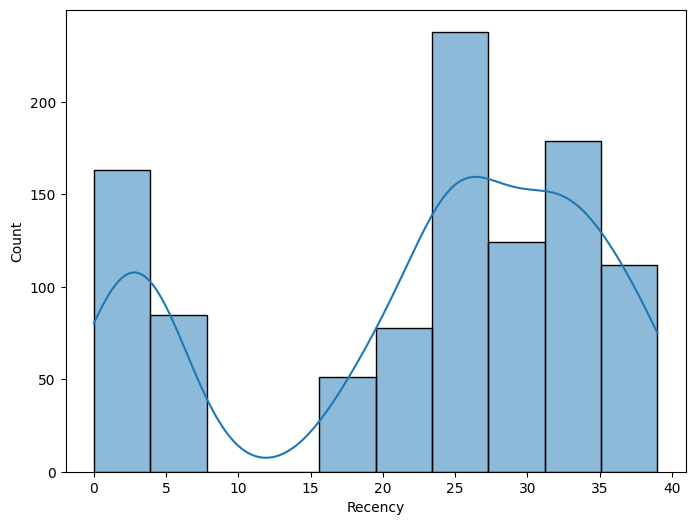

In [275]:
plt.figure(figsize=(8,6))
sns.histplot(data= customer, x= 'Recency', kde= True, bins= 10)
plt.show()

In [276]:
customer['Recency'].median()

np.float64(26.0)

In [277]:
customer['Recency'].describe()

count    1030.000000
mean       22.629126
std        12.385386
min         0.000000
25%        17.250000
50%        26.000000
75%        32.000000
max        39.000000
Name: Recency, dtype: float64

#### Frecuency 

Frecuencia con la que los usuarios compra uno o mas productos.

In [278]:
# Obtener el numero de compras por cliente

frequency= df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns= ['Customer_id','Frequency']
frequency.head()

,Customer_id,Frequency
0,12347.0,1
1,12348.0,1
2,12370.0,2
3,12377.0,1
4,12383.0,1


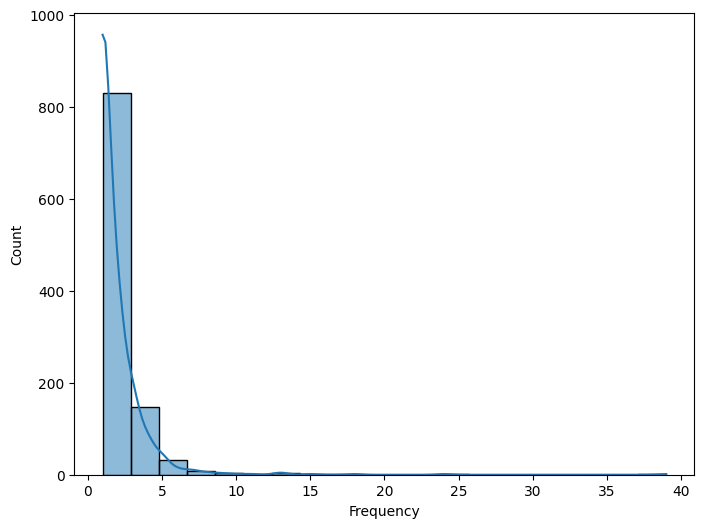

In [279]:
plt.figure(figsize=(8,6))
sns.histplot(data= frequency, x= 'Frequency', kde= True, bins=20)
plt.show()

In [280]:
print(frequency['Frequency'].median())
frequency['Frequency'].describe()

1.0


count    1030.000000
mean        1.880583
std         2.057084
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        39.000000
Name: Frequency, dtype: float64

In [281]:
# unimos los data sets

customer = customer.merge(frequency, on='Customer_id')
customer.head()

,Customer_id,Last_purchase,Recency,Frequency
0,12347.0,2010-12-07 14:57:00,33,1
1,12348.0,2010-12-16 19:09:00,24,1
2,12370.0,2010-12-17 09:38:00,24,2
3,12377.0,2010-12-20 09:37:00,21,1
4,12383.0,2010-12-22 14:28:00,18,1


#### Monetary 

Cuanto ha gastado el usuario en la compra de los productos

In [282]:
df['Total_price']= df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_price
0,536520,21123,SET/10 IVORY POLKADOT PARTY CANDLES,1,2010-12-01 12:43:00,1.25,14729.0,United Kingdom,1.25
1,536520,21124,SET/10 BLUE POLKADOT PARTY CANDLES,1,2010-12-01 12:43:00,1.25,14729.0,United Kingdom,1.25
2,536520,21122,SET/10 PINK POLKADOT PARTY CANDLES,1,2010-12-01 12:43:00,1.25,14729.0,United Kingdom,1.25
3,536520,84378,SET OF 3 HEART COOKIE CUTTERS,1,2010-12-01 12:43:00,1.25,14729.0,United Kingdom,1.25
4,536520,21985,PACK OF 12 HEARTS DESIGN TISSUES,12,2010-12-01 12:43:00,0.29,14729.0,United Kingdom,3.48


In [283]:
monetary= df.groupby('CustomerID')['Total_price'].sum().reset_index()
monetary.columns= ['Customer_id','Monetary']
monetary.head()

,Customer_id,Monetary
0,12347.0,711.79
1,12348.0,892.80
2,12370.0,1868.02
3,12377.0,1001.52
4,12383.0,600.72


In [284]:
# Unimos los data sets para tener toda la informacion en uno solo

customer = customer.merge(monetary, on='Customer_id')
customer.head()


,Customer_id,Last_purchase,Recency,Frequency,Monetary
0,12347.0,2010-12-07 14:57:00,33,1,711.79
1,12348.0,2010-12-16 19:09:00,24,1,892.80
2,12370.0,2010-12-17 09:38:00,24,2,1868.02
3,12377.0,2010-12-20 09:37:00,21,1,1001.52
4,12383.0,2010-12-22 14:28:00,18,1,600.72


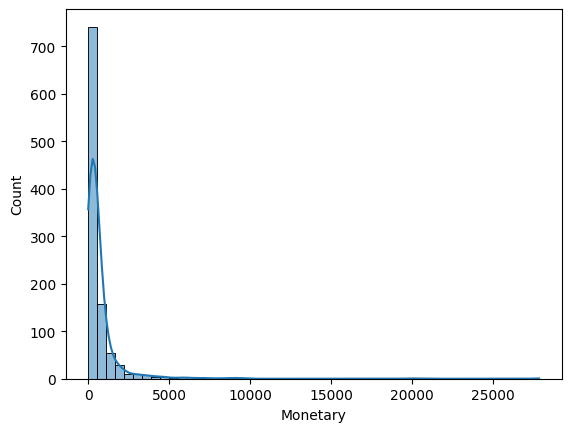

In [285]:
sns.histplot(data= customer, x= 'Monetary', kde= True, bins= 50)
plt.show()

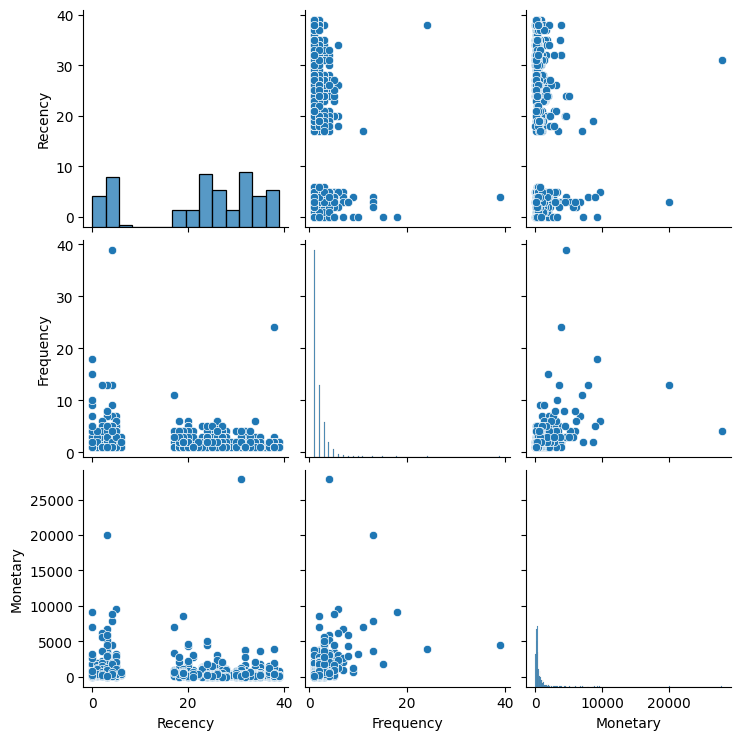

In [286]:
sns.pairplot(customer[['Recency','Frequency','Monetary']])
plt.show()

In [287]:
print(customer['Monetary'].median())
customer['Monetary'].describe()

326.325


count     1030.000000
mean       671.716544
std       1455.778210
min          1.250000
25%        180.512500
50%        326.325000
75%        649.562500
max      27834.610000
Name: Monetary, dtype: float64

Como se observa el gasto medio es cerca de 671 dolares, sin embargo este valor es mas alto que la mediana debido a posibles valores atipicos.

In [288]:
percentile = np.percentile(customer['Monetary'],[90,95,99])
print('Percentiles 90/95/99:', percentile)

Percentiles 90/95/99: [1272.483  2153.891  6072.7309]


No mas del 1% de los clientes realizaron compras por valores superiores al 6072 dolares por lo que podriamos considerar como valores atipicos, podriamos considerarlos valores atipicos

#### Algoritmo K-means 

(Algoritmo no supervisado)

In [289]:
# Funcion para organizar clusters

def order_cluster (cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending= ascending).reset_index(drop= True)
    df_new['index']= df_new.index
    df_final= pd.merge(df,df_new[[cluster_field_name,'index']], on= cluster_field_name)
    df_final= df_final.drop([cluster_field_name], axis=1)
    df_final= df_final.rename(columns={'index':cluster_field_name})
    return df_final

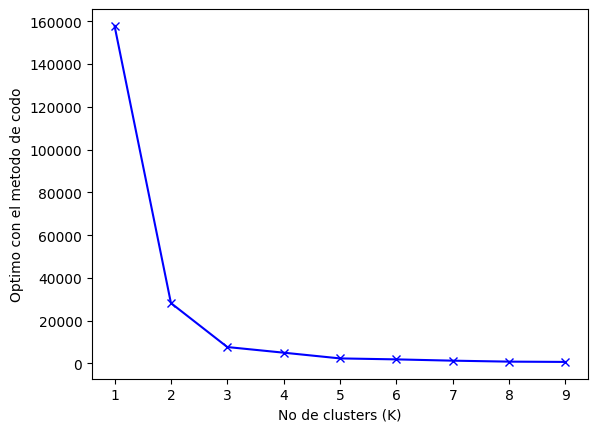

In [290]:
# Vamos a realizar una grafica de codo para estimar el numero de clusters

distortion= []
K= range(1,10)

for i in K:
    kmeanmodel= KMeans(n_clusters= i)
    kmeanmodel.fit(customer[['Recency']])
    distortion.append(kmeanmodel.inertia_)

# plot codo
plt.plot(K,distortion,'bx-')
plt.xlabel('No de clusters (K)')
plt.ylabel('Optimo con el metodo de codo')
plt.show()

In [291]:
RFM_data = customer[['Frequency','Recency','Monetary']].copy()
RFM_data

,Frequency,Recency,Monetary
0,1,33,711.79
1,1,24,892.80
2,2,24,1868.02
3,1,21,1001.52
4,1,18,600.72
...,...,...,...
1025,1,21,50.10
1026,1,32,376.30
1027,2,0,787.77
1028,2,24,198.30


In [292]:
sc= StandardScaler()
X_sc= sc.fit_transform(RFM_data)

km= KMeans(n_clusters=4, random_state=0)

labels= km.fit_predict(X_sc)

RFM_data['Cluster_km']= labels

RFM_data.groupby('Cluster_km').mean()

,Frequency,Recency,Monetary
Cluster_km,,,
0,6.333333,7.166667,8297.331111
1,1.490145,29.186597,411.243968
2,2.357724,3.756098,839.336951
3,21.800000,8.800000,4616.506000


In [293]:
print(RFM_data['Cluster_km'].value_counts().sort_index())

Cluster_km
0     18
1    761
2    246
3      5
Name: count, dtype: int64


In [294]:
# Podemos realizar un ajuste variable por variable para tener mejores resultados.

km= KMeans(n_clusters=3, random_state=0)

# Entrenar algoritmo
km.fit(customer[['Recency']])

# Obtener las predicciones
customer['Recency_cluster'] = km.predict(customer[['Recency']])

#ordenar los clusters
customer = order_cluster('Recency_cluster','Recency', customer,False)

customer.groupby('Recency_cluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Recency_cluster,,,,,,,,
0,382.0,34.193717,2.893410,30.0,32.00,34.0,37.0,39.0
1,400.0,23.935000,3.057638,17.0,22.75,25.0,26.0,29.0
2,248.0,2.709677,1.746131,0.0,1.00,3.0,4.0,6.0


In [295]:
km= KMeans(n_clusters=3, random_state=0)

# Entrenar algoritmo
km.fit(customer[['Frequency']])

# Obtener las predicciones
customer['Frequency_cluster'] = km.predict(customer[['Frequency']])

#ordenar los clusters
customer = order_cluster('Frequency_cluster','Frequency', customer,False)

customer.groupby('Frequency_cluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
Frequency_cluster,,,,,,,,
0,7.0,19.285714,9.569296,13.0,13.0,15.0,21.0,39.0
1,192.0,3.937500,1.431233,3.0,3.0,3.0,4.0,11.0
2,831.0,1.258724,0.438198,1.0,1.0,1.0,2.0,2.0


In [296]:
km= KMeans(n_clusters=3, random_state=0)

# Entrenar algoritmo
km.fit(customer[['Monetary']])

# Obtener las predicciones
customer['Monetary_cluster'] = km.predict(customer[['Monetary']])


#ordenar los clusters
customer = order_cluster('Monetary_cluster','Monetary', customer,False)

customer.groupby('Monetary_cluster')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
Monetary_cluster,,,,,,,,
0,2.0,23903.435000,5559.521001,19972.26,21937.8475,23903.435,25869.0225,27834.61
1,43.0,4640.095581,1968.741867,2614.15,3116.8100,3891.870,5767.6900,9590.40
2,985.0,451.306660,430.787932,1.25,174.4000,316.580,556.5000,2470.44


In [297]:
# Vamos a crear un nuevo scored sumando el valor de cada uno de los clusters
customer['Score']= customer['Recency_cluster'] + customer['Frequency_cluster'] + customer['Monetary_cluster']

# Obtener el proemdio para cada una de las metricas de las calificaciones creadas
customer.groupby('Score')[['Recency','Frequency','Monetary']].mean()


,Recency,Frequency,Monetary
Score,,,
1,34.500000,14.000000,15863.240000
2,19.000000,8.000000,11787.990000
3,25.742857,5.457143,2517.118000
4,30.962637,1.780220,597.499495
5,20.348958,1.789062,520.985703
6,2.618421,1.348684,503.589934


In [298]:
# Crear una funcion para asignar su valores segun su Score

def segmentacion (Score):
    if(0 <= Score <=1):
        s='Hight-value'
    elif(2 <= Score <= 5):
        s='Potencial'
    else:
        s= 'Clientes-regulares'
    return s

customer['Segmento']= customer.apply(lambda x: segmentacion(x['Score']), axis=1)

In [299]:
customer.sample(5)

,Customer_id,Last_purchase,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster,Score,Segmento
439,15046.0,2011-01-05 15:30:00,4,1,511.95,2,2,2,6,Clientes-regulares
149,13165.0,2010-12-23 14:06:00,17,1,354.64,1,2,2,5,Potencial
27,12500.0,2011-01-10 09:48:00,0,1,344.94,2,2,2,6,Clientes-regulares
871,17470.0,2010-12-07 09:57:00,34,1,178.40,0,2,2,4,Potencial
788,17059.0,2010-12-05 12:35:00,35,1,722.36,0,2,2,4,Potencial


In [300]:
customer.value_counts('Segmento')

Segmento
Potencial             876
Clientes-regulares    152
Hight-value             2
Name: count, dtype: int64

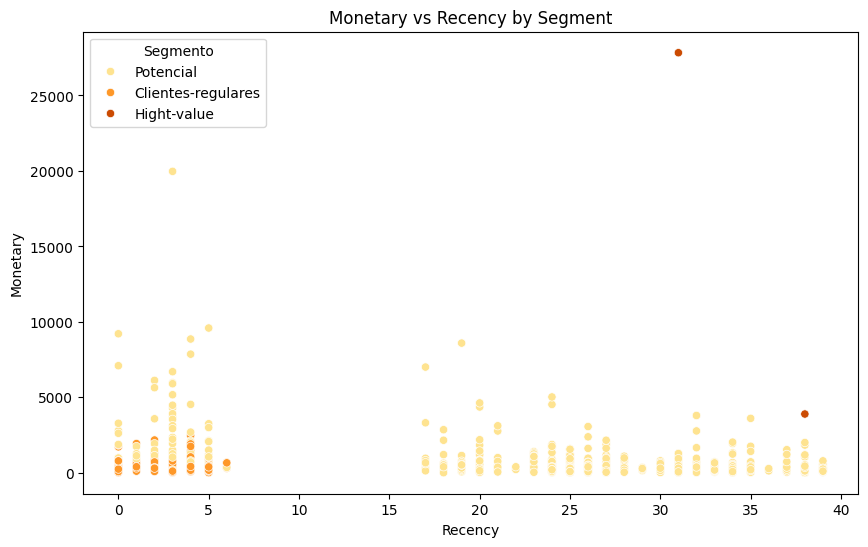

In [301]:

plt.figure(figsize=(10,6))
sns.scatterplot(data= customer, x='Recency',y= 'Monetary', hue='Segmento', palette='YlOrBr')
plt.title('Monetary vs Recency by Segment')
plt.show()



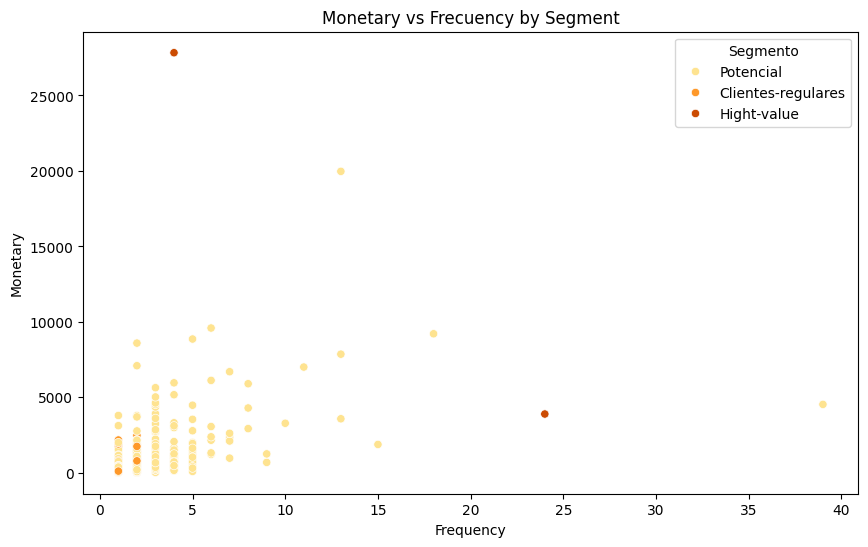

In [302]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= customer, x='Frequency',y= 'Monetary', hue='Segmento', palette='YlOrBr')
plt.title('Monetary vs Frecuency by Segment')
plt.show()

#### Conclusiones y Recomendaciones 

* 'Hight-value'
Si bien el segmento representa un gran ingreso monetario no son muchos clientes que entren en este rango, Contacto personalizado para investigar su ausencia, Oferta exclusiva de reactivación con beneficios premium, Encuesta de satisfacción con incentivo para entender su abandono, Programa de recuperación con atención preferencial.

*  'Potencial'
Como su nombre lo indica es el segmento con mas potencial,se pueden desarrollar programas para aumentar la frecuencia,Programas de lealtad con descuentos por frecuencia de compra, Ofertas de productos premium para aumentar el ticket promedio, Comunicación personalizada con recomendaciones, Beneficios escalonados por volumen de compras

* 'Clientes Regulares'
Son los clientes que suelen comprar mas a menudo y los productos que compran son menores, se recomiendan Programas de segunda compra con descuentos progresivos, Descuentos por cantidad para incentivar compras mayores, Campañas de product bundling para aumentar el valor del carrito, Comunicación de nuevos lanzamientos que se alineen con sus patrones de compra, Programas de fidelización simples y fáciles de entender